# RETO 01: MODELO DE RED NEURONAL PARA PREDECIR LA TASA DE FALLECIMIENTOS POR COVID

## FUENTE: [DATOS ABIERTOS - COVID](https://www.datosabiertos.gob.pe/dataset/fallecidos-por-covid-19-ministerio-de-salud-minsa/resource/4b7636f3-5f0c-4404-8526)

### AUTOR: MIGUEL HUAYANEY MILLA

# 01. IMPORTACIÓN DE LIBRERIAS

In [ ]:
!pip install pyjanitor
import janitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 13.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 02. CARGA DEL DATASET

In [ ]:
df_covid = pd.read_csv('/content/fallecidos_covid.csv', sep=';')
df_covid.head(10)

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
0,20240317,20220219,63,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203506.0
1,20240317,20210529,74,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203532.0
2,20240317,20210623,72,FEMENINO,Criterio SINADEF,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203584.0
3,20240317,20210824,85,MASCULINO,Criterio investigación Epidemiológica,TUMBES,TUMBES,TUMBES,240101.0,212541.0
4,20240317,20210627,46,MASCULINO,Criterio virológico,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203665.0
5,20240317,20210423,58,MASCULINO,Criterio clínico,TUMBES,ZARUMILLA,ZARUMILLA,240301.0,221184.0
6,20240317,20210401,73,FEMENINO,Criterio virológico,TUMBES,ZARUMILLA,ZARUMILLA,240301.0,221211.0
7,20240317,20220914,92,FEMENINO,Criterio virológico,TUMBES,TUMBES,CORRALES,240102.0,229901.0
8,20240317,20210409,66,MASCULINO,Criterio virológico,PIURA,PIURA,CASTILLA,200104.0,846032.0
9,20240317,20211030,64,FEMENINO,Criterio SINADEF,PUNO,MOHO,MOHO,210901.0,846152.0


# 03. EDA

In [ ]:
df_covid.shape

(220918, 10)

In [ ]:
df_covid.dtypes

,0
FECHA_CORTE,int64
FECHA_FALLECIMIENTO,int64
EDAD_DECLARADA,int64
SEXO,object
CLASIFICACION_DEF,object
DEPARTAMENTO,object
PROVINCIA,object
DISTRITO,object
UBIGEO,float64
UUID,float64


## 3.1. TRATAMIENTO DE NULOS

In [ ]:
df_covid.isnull().sum().sum()

np.int64(2484)

In [ ]:
df_covid.isnull().sum()

,0
FECHA_CORTE,0
FECHA_FALLECIMIENTO,0
EDAD_DECLARADA,0
SEXO,0
CLASIFICACION_DEF,0
DEPARTAMENTO,0
PROVINCIA,5
DISTRITO,5
UBIGEO,5
UUID,2469


In [ ]:
df_covid.dropna(subset=['UUID'], inplace=True)
df_covid.shape

(218449, 10)

## 3.2. TRATAMIENTO DE DUPLICADOS

In [ ]:
df_covid.duplicated().sum()

np.int64(4)

In [ ]:
df_covid.drop_duplicates(inplace=True)
df_covid.shape

(218445, 10)

# 04. ANALISIS DE VARIABLES

## 04.1. VARIABLE: CLASIFICACION_DEF

In [ ]:
df_covid.CLASIFICACION_DEF.value_counts()

,count
CLASIFICACION_DEF,
Criterio virológico,84193
Criterio SINADEF,65249
Criterio serológico,42745
Criterio investigación Epidemiológica,10528
Criterio clínico,8366
Criterio radiológico,5050
Criterio nexo epidemiológico,2175
NotiCovid,123
sinadef,16


## 04.2. VARIABLE: FECHA_FALLECIMIENTO

In [ ]:
df_covid['FECHA_FALLECIMIENTO'].sort_values(ascending=True)

,FECHA_FALLECIMIENTO
105918,20200303
115087,20200304
177377,20200307
70449,20200308
204024,20200311
...,...
48748,20240223
76939,20240225
57945,20240227
9125,20240301


In [ ]:
df_covid['FECHA_FALLECIMIENTO'] = df_covid['FECHA_FALLECIMIENTO'].astype(str)
df_covid['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_covid['FECHA_FALLECIMIENTO'], format='%Y%m%d')
df_covid.head(10)

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
0,2024-03-17,2022-02-19,63,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203506.0
1,2024-03-17,2021-05-29,74,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203532.0
2,2024-03-17,2021-06-23,72,FEMENINO,Criterio SINADEF,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203584.0
3,2024-03-17,2021-08-24,85,MASCULINO,Criterio investigación Epidemiológica,TUMBES,TUMBES,TUMBES,240101.0,212541.0
4,2024-03-17,2021-06-27,46,MASCULINO,Criterio virológico,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203665.0
5,2024-03-17,2021-04-23,58,MASCULINO,Criterio clínico,TUMBES,ZARUMILLA,ZARUMILLA,240301.0,221184.0
6,2024-03-17,2021-04-01,73,FEMENINO,Criterio virológico,TUMBES,ZARUMILLA,ZARUMILLA,240301.0,221211.0
7,2024-03-17,2022-09-14,92,FEMENINO,Criterio virológico,TUMBES,TUMBES,CORRALES,240102.0,229901.0
8,2024-03-17,2021-04-09,66,MASCULINO,Criterio virológico,PIURA,PIURA,CASTILLA,200104.0,846032.0
9,2024-03-17,2021-10-30,64,FEMENINO,Criterio SINADEF,PUNO,MOHO,MOHO,210901.0,846152.0


In [ ]:
df_covid['FECHA_FALLECIMIENTO'].sort_values(ascending=True)

,FECHA_FALLECIMIENTO
105918,2020-03-03
115087,2020-03-04
177377,2020-03-07
70449,2020-03-08
218320,2020-03-11
...,...
48748,2024-02-23
76939,2024-02-25
57945,2024-02-27
9125,2024-03-01


In [ ]:
df_covid['año_mes'] = df_covid['FECHA_FALLECIMIENTO'].dt.to_period('M')
df_covid.head(10)

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID,año_mes
0,2024-03-17,2022-02-19,63,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203506.0,2022-02
1,2024-03-17,2021-05-29,74,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203532.0,2021-05
2,2024-03-17,2021-06-23,72,FEMENINO,Criterio SINADEF,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203584.0,2021-06
3,2024-03-17,2021-08-24,85,MASCULINO,Criterio investigación Epidemiológica,TUMBES,TUMBES,TUMBES,240101.0,212541.0,2021-08
4,2024-03-17,2021-06-27,46,MASCULINO,Criterio virológico,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203665.0,2021-06
5,2024-03-17,2021-04-23,58,MASCULINO,Criterio clínico,TUMBES,ZARUMILLA,ZARUMILLA,240301.0,221184.0,2021-04
6,2024-03-17,2021-04-01,73,FEMENINO,Criterio virológico,TUMBES,ZARUMILLA,ZARUMILLA,240301.0,221211.0,2021-04
7,2024-03-17,2022-09-14,92,FEMENINO,Criterio virológico,TUMBES,TUMBES,CORRALES,240102.0,229901.0,2022-09
8,2024-03-17,2021-04-09,66,MASCULINO,Criterio virológico,PIURA,PIURA,CASTILLA,200104.0,846032.0,2021-04
9,2024-03-17,2021-10-30,64,FEMENINO,Criterio SINADEF,PUNO,MOHO,MOHO,210901.0,846152.0,2021-10


In [ ]:
df_covid_series = df_covid.groupby(['año_mes']).size().reset_index(name='nro_fallecidos')
df_covid_series

,año_mes,nro_fallecidos
0,2020-03,174
1,2020-04,5035
2,2020-05,16073
3,2020-06,17226
4,2020-07,18326
5,2020-08,17480
6,2020-09,8357
7,2020-10,4402
8,2020-11,3186
9,2020-12,3828


In [ ]:
df_covid_series['año_mes'] = df_covid_series['año_mes'].astype(str)

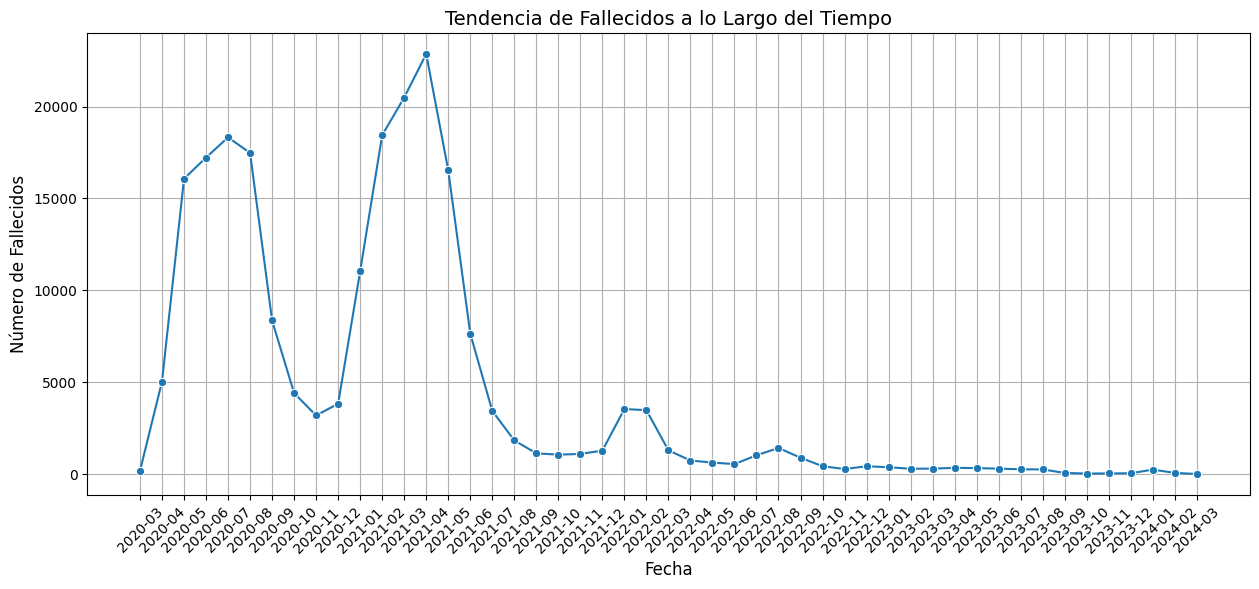

In [ ]:
plt.figure(figsize=(15, 6))

# Crear el gráfico de línea
sns.lineplot(data=df_covid_series, x='año_mes', y='nro_fallecidos', marker='o', linestyle='-')

# Personalizar el gráfico
plt.title('Tendencia de Fallecidos a lo Largo del Tiempo', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de Fallecidos', fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.grid(True)

# Mostrar el gráfico
plt.show()

# 05. GUARDAMOS EL DATASET

In [ ]:
df_covid_series.to_csv('fallecidos_covid_series.csv', index=False)

In [ ]:
df = pd.read_csv('/content/fallecidos_covid_series.csv')
df.head(10)

,año_mes,nro_fallecidos
0,2020-03,174
1,2020-04,5035
2,2020-05,16073
3,2020-06,17226
4,2020-07,18326
5,2020-08,17480
6,2020-09,8357
7,2020-10,4402
8,2020-11,3186
9,2020-12,3828


# 06. PREPARACIÓN DE DATOS ANTES DE ENTRENAMIENTO

## 06.1. ESCALAMIENTO DE VARIABLES Y CREACIÓN DE SECUENCIAS PARA X E Y

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(df['nro_fallecidos'].values.reshape(-1, 1))
data

array([[0.0075234 ],
       [0.22014697],
       [0.70295687],
       [0.7533899 ],
       [0.80150468],
       [0.76450004],
       [0.36545359],
       [0.1924591 ],
       [0.13927041],
       [0.16735194],
       [0.48285364],
       [0.80666608],
       [0.89637827],
       [1.        ],
       [0.72334004],
       [0.33435395],
       [0.15029306],
       [0.07987053],
       [0.04916455],
       [0.04601522],
       [0.04772111],
       [0.05563818],
       [0.15453591],
       [0.15204269],
       [0.05633803],
       [0.03206194],
       [0.02716298],
       [0.0235325 ],
       [0.04452804],
       [0.0618931 ],
       [0.03875426],
       [0.01850232],
       [0.01180999],
       [0.0183711 ],
       [0.01605284],
       [0.0124661 ],
       [0.01281603],
       [0.0146094 ],
       [0.01404077],
       [0.01264106],
       [0.01119762],
       [0.01080395],
       [0.00253696],
       [0.00104978],
       [0.00135596],
       [0.00166215],
       [0.01041029],
       [0.002

In [ ]:
def create_sequences(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)

In [ ]:
seq_length = 12 #Para 12 meses
X, y = create_sequences(data, seq_length)

## 06.2. DIVISIÓN DEL DATASET

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 06.3. CREACIÓN DE LA RED NEURONAL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 07. ENTRENAMIENTO DE LA RED NEURONAL

In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0714 - val_loss: 0.0012
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step - loss: 0.0611 - val_loss: 0.0041
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0536 - val_loss: 0.0097
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0492 - val_loss: 0.0178
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.0476 - val_loss: 0.0266
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0479 - val_loss: 0.0326
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0484 - val_loss: 0.0343
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 0.0478 - val_loss: 0.0325
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0463 - val_loss: 0.0288
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0446 - val_loss: 0.0245
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.0431 - val_loss: 0.0208
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0423

# 08. GRAFICA DE PREDICCIONES

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


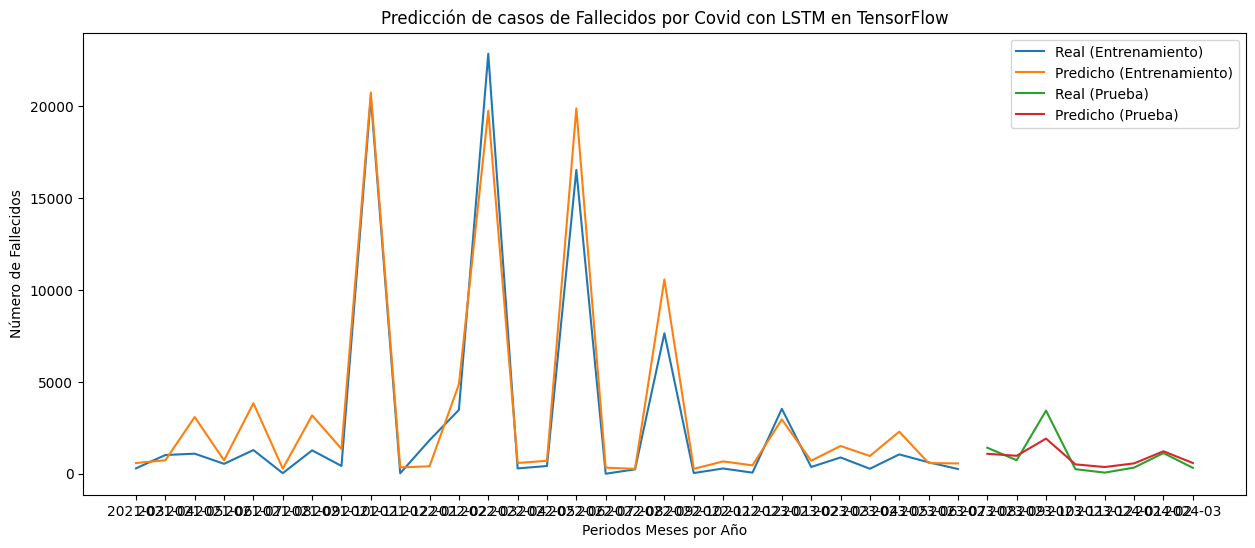

In [ ]:
# Realizar predicciones
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
split = int(len(X) * 0.8)
# Graficar resultados
plt.figure(figsize=(15, 6))
plt.plot(df["año_mes"][seq_length:split+seq_length], scaler.inverse_transform(y_train), label="Real (Entrenamiento)")
plt.plot(df["año_mes"][seq_length:split+seq_length], scaler.inverse_transform(y_pred_train), label="Predicho (Entrenamiento)")
plt.plot(df["año_mes"][split+seq_length:], scaler.inverse_transform(y_test), label="Real (Prueba)")
plt.plot(df["año_mes"][split+seq_length:], scaler.inverse_transform(y_pred_test), label="Predicho (Prueba)")
plt.legend()
plt.xlabel("Periodos Meses por Año")
plt.ylabel("Número de Fallecidos")
plt.title("Predicción de casos de Fallecidos por Covid con LSTM en TensorFlow")
plt.show()